In [1]:
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [2]:
hot_100 = pd.read_csv("hot_100.csv")

In [3]:
hot_100.drop(columns = ['Unnamed: 0'], inplace = True)
print(hot_100)

                           Song                                Artist
0                       Flowers                           Miley Cyrus
1                     Kill Bill                                   SZA
2                    Last Night                         Morgan Wallen
3                        Unholy                Sam Smith & Kim Petras
4                      Creepin'  Metro Boomin, The Weeknd & 21 Savage
..                          ...                                   ...
95                   Yandel 150                         Yandel & Feid
96               Heart To Heart                           Mac DeMarco
97          Next Thing You Know                          Jordan Davis
98  Never Gonna Not Dance Again                                  P!nk
99                    Open Arms            SZA Featuring Travis Scott

[100 rows x 2 columns]


In [4]:
song_random = hot_100.sample()

In [5]:
songs = []
for i in hot_100['Song']:
    songs.append(i)
    
artists = []
for i in hot_100['Artist']:
    artists.append(i)

In [6]:
def treating_typos_song():
    song_input = input("Please, write the title of the song.")
    if process.extractOne(song_input, songs)[1] > 80:
        song_ = process.extractOne(song_input, songs)[0]
    else:
        song_ = song_input
    return song_

In [7]:
def treating_typos_artist():
    artist_input = input("Please, write the name of the artist.")
    if process.extractOne(artist_input, artists)[1] > 80:
        artist_ = process.extractOne(artist_input, artists)[0]
    else:
        artist_ = artist_input
    return artist_

In [8]:
def filter_song_out(song, artist):
    idx = hot_100.index[(hot_100['Song'] == song) & (hot_100['Artist'] == artist)].tolist()[0]
    hot_100.drop(idx)

In [9]:
spotify_songs = pd.read_csv("songs2.csv")
spotify_songs

,Unnamed: 0.1,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,Unnamed: 0
0,0,0.621,0.310,-10.164,0.0283,0.94500,0.000061,0.117,0.125,111.893,0GNI8K3VATWBABQFAzBAYe,240707,NaN
1,1,0.792,0.625,-5.609,0.0536,0.00776,0.001880,0.329,0.370,103.967,12VWzyPDBCc8fqeWCAfNwR,173987,NaN
2,2,0.629,0.551,-5.402,0.0263,0.04180,0.000001,0.108,0.699,111.961,5th1bFGGaXLM7wDBJpcF06,268880,NaN
3,3,0.565,0.849,-3.516,0.0517,0.00868,0.000005,0.120,0.427,102.034,6s3GEN8wK0OMzzzZbXj0fu,212647,NaN
4,4,0.569,0.785,-4.057,0.0457,0.05050,0.000001,0.086,0.303,128.031,0xIVvRmjztR1AwuHrkhH41,148387,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,6772,0.440,0.528,-7.809,0.0317,0.01710,0.002030,0.234,0.132,185.972,3nsfB1vus2qaloUdcBZvDu,329160,431.0
9921,6773,0.694,0.831,-7.288,0.0301,0.16500,0.000892,0.250,0.980,125.901,7Cuk8jsPPoNYQWXK9XRFvG,215080,435.0
9922,6774,0.889,0.818,-4.639,0.2530,0.47000,0.000000,0.179,0.782,96.063,5ByAIlEEnxYdvpnezg7HTX,302760,468.0
9923,6775,0.646,0.880,-7.753,0.0637,0.06230,0.157000,0.355,0.802,116.916,1Tr4K5MU5XYE44umXGDndd,259600,472.0


In [10]:
X = spotify_songs.drop(columns = spotify_songs[["id", "Unnamed: 0.1", "Unnamed: 0"]]) #removing the if column so it doesn't get standardized
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.621,0.310,-10.164,0.0283,0.94500,0.000061,0.117,0.125,111.893,240707
1,0.792,0.625,-5.609,0.0536,0.00776,0.001880,0.329,0.370,103.967,173987
2,0.629,0.551,-5.402,0.0263,0.04180,0.000001,0.108,0.699,111.961,268880
3,0.565,0.849,-3.516,0.0517,0.00868,0.000005,0.120,0.427,102.034,212647
4,0.569,0.785,-4.057,0.0457,0.05050,0.000001,0.086,0.303,128.031,148387
...,...,...,...,...,...,...,...,...,...,...
9920,0.440,0.528,-7.809,0.0317,0.01710,0.002030,0.234,0.132,185.972,329160
9921,0.694,0.831,-7.288,0.0301,0.16500,0.000892,0.250,0.980,125.901,215080
9922,0.889,0.818,-4.639,0.2530,0.47000,0.000000,0.179,0.782,96.063,302760
9923,0.646,0.880,-7.753,0.0637,0.06230,0.157000,0.355,0.802,116.916,259600


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.458195,-1.243457,-0.263243,-0.590165,2.039044,-0.396291,-0.469208,-1.416843,-0.293738,0.121298
1,1.398344,0.016097,0.622535,-0.250842,-0.919690,-0.389263,0.837248,-0.506823,-0.556704,-0.706543
2,0.502179,-0.279798,0.662789,-0.616988,-0.812231,-0.396523,-0.524671,0.715203,-0.291482,0.470860
3,0.150310,0.911780,1.029545,-0.276325,-0.916786,-0.396509,-0.450721,-0.295104,-0.620836,-0.226862
4,0.172302,0.655871,0.924341,-0.356796,-0.784766,-0.396523,-0.660247,-0.755686,0.241682,-1.024179
...,...,...,...,...,...,...,...,...,...,...
9920,-0.536934,-0.371765,0.194717,-0.544564,-0.890205,-0.388683,0.251808,-1.390843,2.164024,1.218795
9921,0.859545,0.839806,0.296032,-0.566023,-0.423306,-0.393080,0.350408,1.758940,0.171013,-0.196674
9922,1.931645,0.787824,0.811164,2.423502,0.539536,-0.396527,-0.087132,1.023496,-0.818940,0.891232
9923,0.595644,1.035736,0.205606,-0.115381,-0.747515,0.210121,0.997474,1.097783,-0.127087,0.355716


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

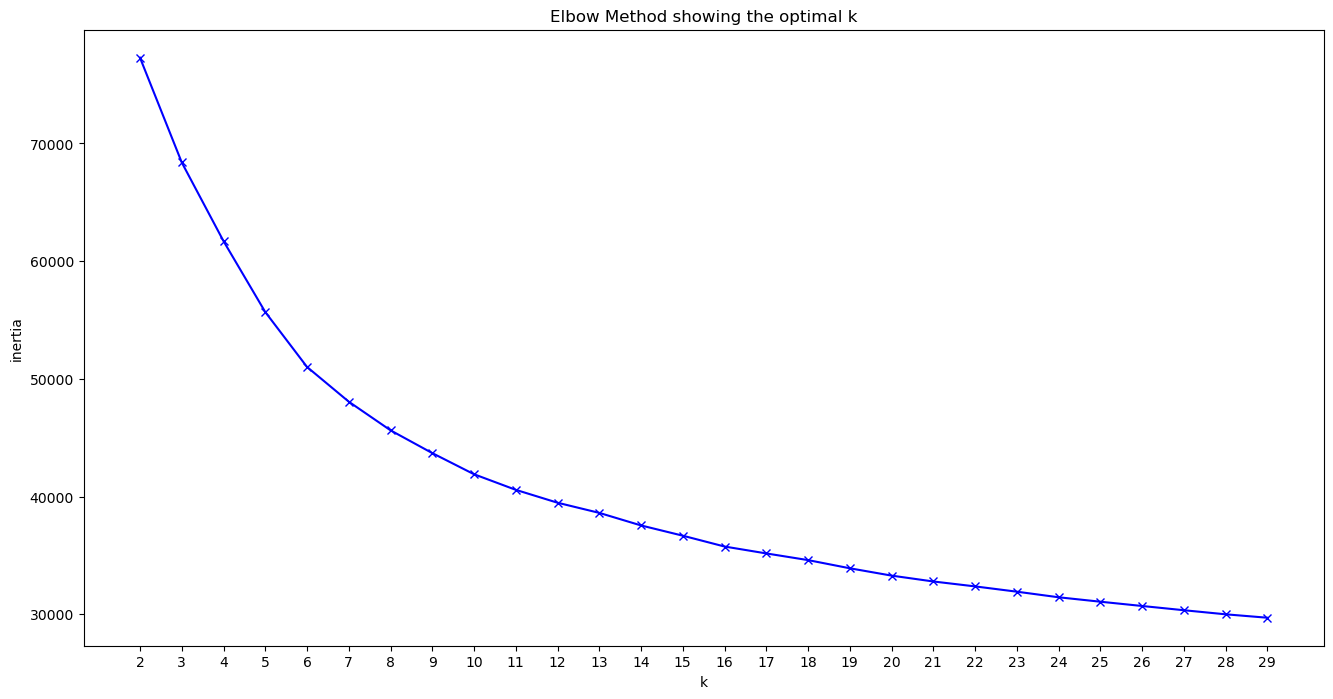

In [13]:
#Finding the best number of clusters

from sklearn.cluster import KMeans

K = range(2, 30)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

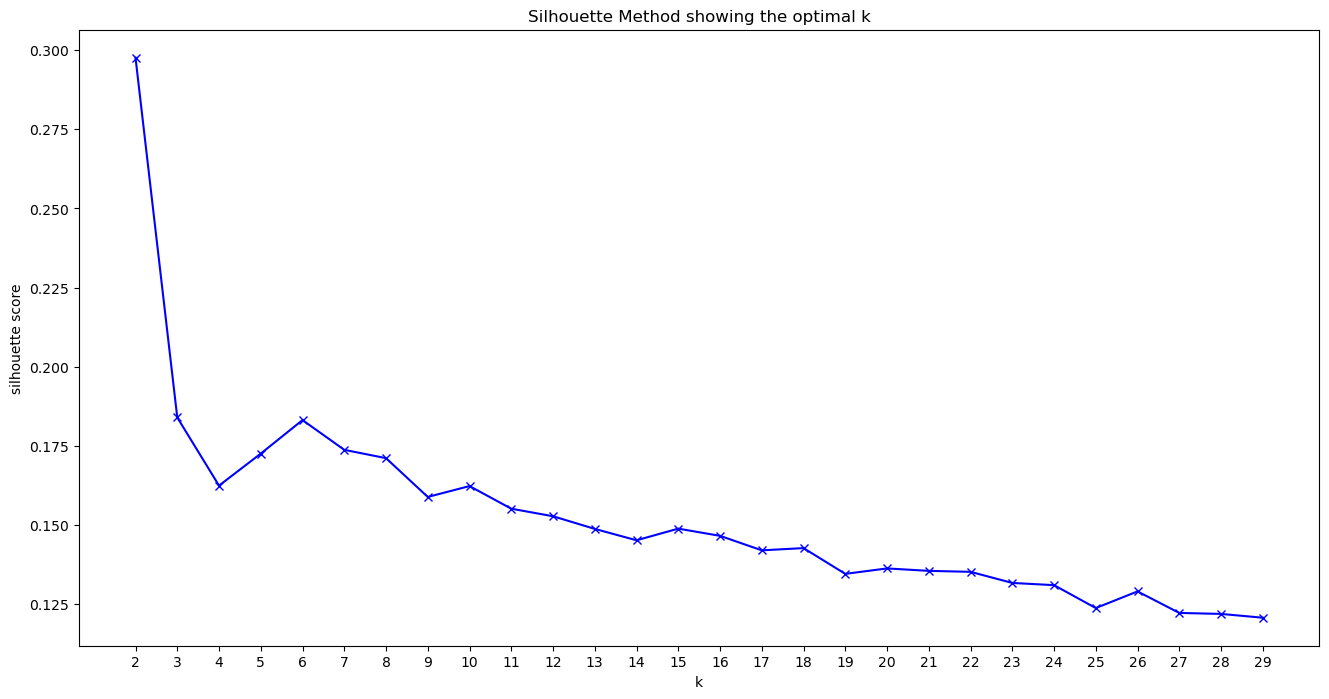

In [14]:
import pickle
from sklearn.metrics import silhouette_score

K = range(2, 30)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [15]:
#Looks like 6 is the optimal number of clusters to work with

In [52]:
kmeans = KMeans(n_clusters=300, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=300, random_state=1234)

In [53]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0      28
1      60
2      50
3      33
4      40
       ..
295    39
296    48
297    33
298     7
299     3
Length: 300, dtype: int64

In [54]:
X["cluster"] = clusters

In [55]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.621,0.310,-10.164,0.0283,0.94500,0.000061,0.117,0.125,111.893,240707,53
1,0.792,0.625,-5.609,0.0536,0.00776,0.001880,0.329,0.370,103.967,173987,42
2,0.629,0.551,-5.402,0.0263,0.04180,0.000001,0.108,0.699,111.961,268880,250
3,0.565,0.849,-3.516,0.0517,0.00868,0.000005,0.120,0.427,102.034,212647,33
4,0.569,0.785,-4.057,0.0457,0.05050,0.000001,0.086,0.303,128.031,148387,133
...,...,...,...,...,...,...,...,...,...,...,...
9920,0.440,0.528,-7.809,0.0317,0.01710,0.002030,0.234,0.132,185.972,329160,78
9921,0.694,0.831,-7.288,0.0301,0.16500,0.000892,0.250,0.980,125.901,215080,52
9922,0.889,0.818,-4.639,0.2530,0.47000,0.000000,0.179,0.782,96.063,302760,139
9923,0.646,0.880,-7.753,0.0637,0.06230,0.157000,0.355,0.802,116.916,259600,206


In [56]:
spotify_df = pd.concat([X, spotify_songs["id"]], axis=1)
spotify_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
0,0.621,0.310,-10.164,0.0283,0.94500,0.000061,0.117,0.125,111.893,240707,53,0GNI8K3VATWBABQFAzBAYe
1,0.792,0.625,-5.609,0.0536,0.00776,0.001880,0.329,0.370,103.967,173987,42,12VWzyPDBCc8fqeWCAfNwR
2,0.629,0.551,-5.402,0.0263,0.04180,0.000001,0.108,0.699,111.961,268880,250,5th1bFGGaXLM7wDBJpcF06
3,0.565,0.849,-3.516,0.0517,0.00868,0.000005,0.120,0.427,102.034,212647,33,6s3GEN8wK0OMzzzZbXj0fu
4,0.569,0.785,-4.057,0.0457,0.05050,0.000001,0.086,0.303,128.031,148387,133,0xIVvRmjztR1AwuHrkhH41
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,0.440,0.528,-7.809,0.0317,0.01710,0.002030,0.234,0.132,185.972,329160,78,3nsfB1vus2qaloUdcBZvDu
9921,0.694,0.831,-7.288,0.0301,0.16500,0.000892,0.250,0.980,125.901,215080,52,7Cuk8jsPPoNYQWXK9XRFvG
9922,0.889,0.818,-4.639,0.2530,0.47000,0.000000,0.179,0.782,96.063,302760,139,5ByAIlEEnxYdvpnezg7HTX
9923,0.646,0.880,-7.753,0.0637,0.06230,0.157000,0.355,0.802,116.916,259600,206,1Tr4K5MU5XYE44umXGDndd


In [57]:
import config

In [58]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame, display
import random

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= "beba121b335d4a9d95e083d26c5ef644",
                                                           client_secret= "ef6e57241a3d47a6b3ad1400c4ed610e"))

In [69]:
def hot_songs():
    song_ = treating_typos_song()
    artist_ = treating_typos_artist()
    
    if song_ in songs and artist_ in artists:
        filter_song_out(song_, artist_)
        x = list(song_random["Song"])[0]
        y = list(song_random["Artist"])[0]
        output_song1 = sp.search(q=y + x, limit=1)
        track_id1=output_song1["tracks"]["items"][0]["id"]
        music1 = IFrame(src="https://open.spotify.com/embed/track/"+track_id1,
                      width="320",
                      height="80",
                     frameborder="0",
                      allowtransparency="true",
                      allow="encrypted-media",
                    )
        print("Your song is in the top 100 and this is our recommendation for you:")
        display(music1)
    else:
        input_song = sp.search(q=artist_ + song_,limit=1)
        track_id=input_song["tracks"]["items"][0]["id"]
        music = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
                      width="320",
                      height="80",
                     frameborder="0",
                      allowtransparency="true",
                      allow="encrypted-media",
                    )
        
        
        display(music)
        confirmation = input("Is this the song you chose?(y/n) ")
        print(confirmation)
        if confirmation == "n":
            print("Please, try again.")
        elif confirmation == "y":
            song_df = pd.DataFrame(sp.audio_features(input_song["tracks"]["items"][0]["id"]))
            song_df=song_df[["danceability","energy","loudness","speechiness","acousticness", "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
            song_df2 = song_df.drop(columns = "id")
            song_df2_scaled = scaler.transform(song_df2)
            song_df2_scaled = pd.DataFrame(song_df2_scaled, columns = song_df2.columns)
            cluster = int(kmeans.predict(song_df2_scaled))
            similar_songs = list(np.where(spotify_df["cluster"] == cluster)[0])
            recommendation = random.choice(similar_songs)
            id_recommendation = spotify_df.iloc[recommendation,11]
            output_song = IFrame(src="https://open.spotify.com/embed/track/"+id_recommendation,
                             width="320",
                             height="80",
                             frameborder="0",
                             allowtransparency="true",
                             allow="encrypted-media",
                            )
            print("This is our recommendation for you:")
            return output_song
        else:
            print("You should type y for yes or n for no. Please try again.")


In [86]:
hot_songs()

KeyboardInterrupt: Interrupted by user